In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

In [2]:
###Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris

In [3]:
irisdf=load_iris(return_X_y=True, as_frame=True)
irisdf

(     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2   

In [4]:
###Global Parameters
#I/O Directory for storing Results
inpDir='../Inputs'
outDir='../Outputs'

In [5]:
#Setting the Random Seed
RANDOM_STATE=108
np.random.seed(RANDOM_STATE)

In [6]:
#Number of Repetitions
EPOCHS=20000

In [7]:
#Setting the Learning Rate
ALPHA=0.18

In [8]:
#Settings for Generated Sample set
NUM_SAMPLES = 1350 # How many samples we want to generate 
NOISE = 0.24 # Noise to be introduced in the data

In [9]:
#Setting the Test-Train Split
TEST_SIZE = 0.21

In [10]:
##Setting the Theme for all Graphs
sns.set_theme()
params={'legend.fontsize':18, 
        'font.family':'serif', 
        'font.size': 18, 
        'figure.figsize':(27,18), 
        'axes.labelsize': 20, 
        'axes.titlesize':22, 
        'xtick.labelsize':16,
        'ytick.labelsize':16
       }
plt.rcParams.update(params)
CMAP='brg'

In [11]:
#####################################################
dataset= load_iris()

##Setting X,y partitions
X=dataset.data

y=dataset.target

In [12]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
##Seeing the Dataset description
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
## Scaling the Data

scaler=StandardScaler()

X=scaler.fit_transform(X)

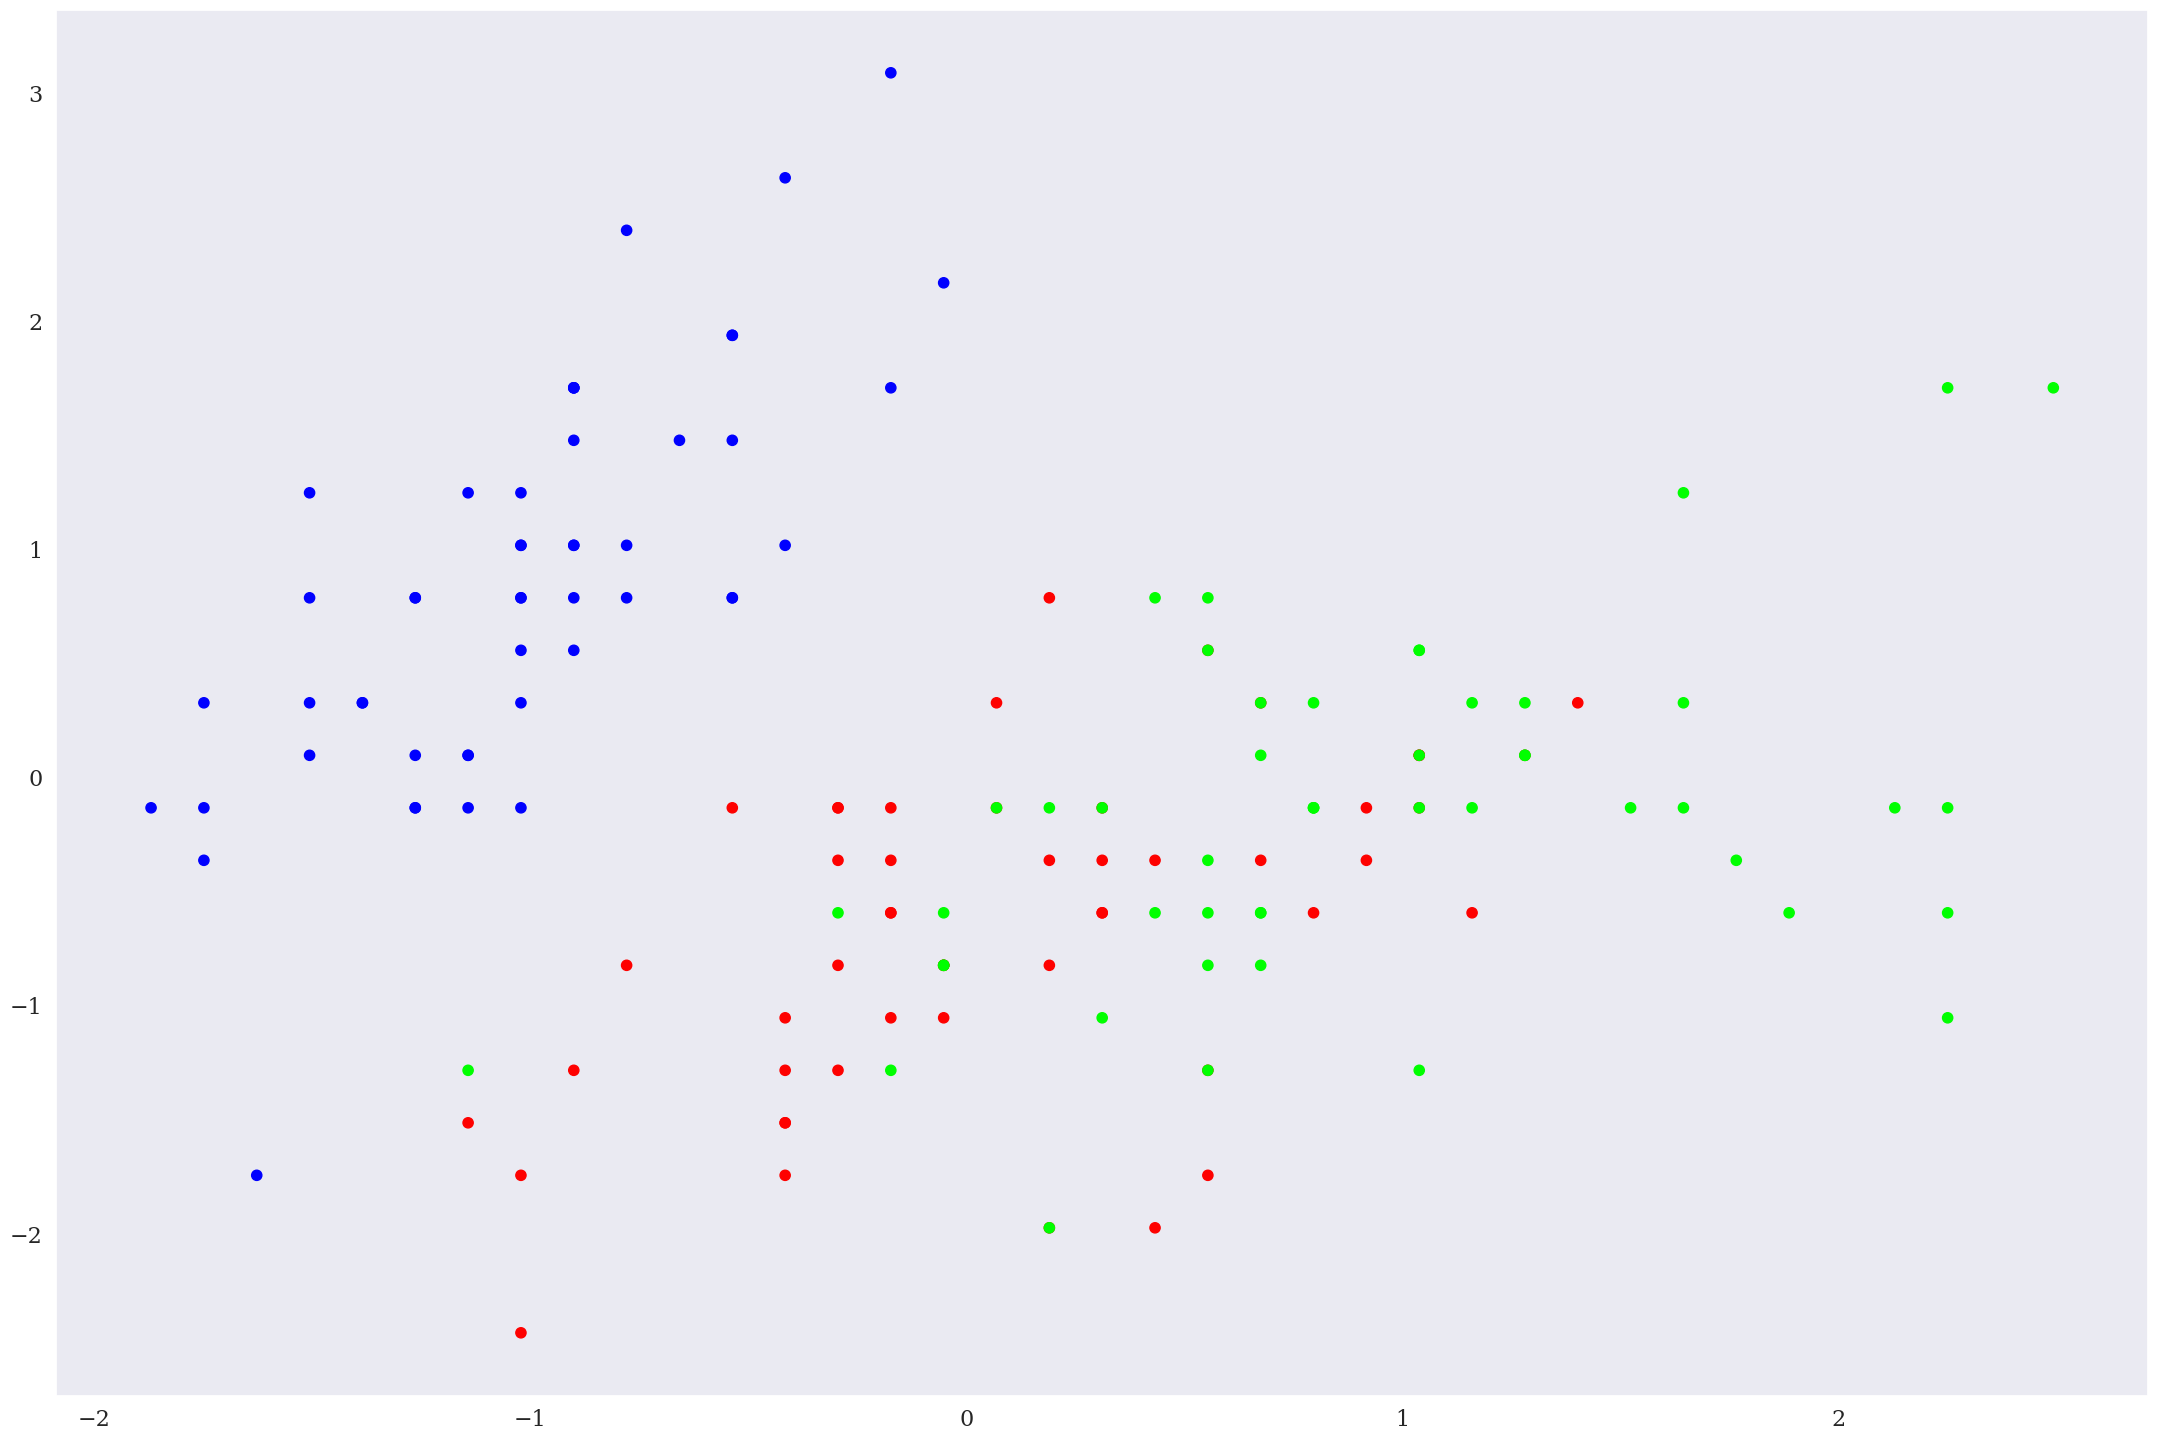

In [16]:
# Lets Plotting the data
plt.scatter(X[:,0], X[:,1], s=54, c=y, marker='o', cmap=CMAP)

plt.grid()

In [17]:
##Adding Dummies to increase Output values to 
y= pd.get_dummies(y).values
#####################################################
#### DEFINING ALL FUNCTIONS TOGETHER
#####################################################
## Contour Graph, Placing Outputs
def fn_plot_decision_boundary(pred_func, X, y):
    '''
        Args:
           pred_func : function based on predict method of the classifier
           X : feature matrix
           y : targets
       Return:
           None
    '''
    
    # Set min and max values and give it some padding
    xMin, xMax = X[:, 0].min() - .05, X[:, 0].max() + .05
    yMin, yMax = X[:, 1].min() - .05, X[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    

    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])

    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=CMAP, alpha = 0.54)
    
    # plot the points as well
    plt.scatter(X[:, 0], X[:, 1], 
                c=np.argmax(y, axis=1), ### for multiclass data
                cmap=CMAP, 
                edgecolors='black')

In [18]:
#####################################################
### Defining SoftMax Function, for activation
def fn_softmax(z):
    '''
        Args:
           z : array
       Return:
           Softmax Values aka Probabilities
    '''
    exp_sc= np.exp(z)
    
    return exp_sc / np.sum( exp_sc, axis=1, keepdims=True)

In [19]:
#####################################################
### Defining 'tanh'
def fn_tanh(x):

    return np.tanh(x)

def fn_tanh_prime(x):

    return 1.0 - np.tanh(x)**2

In [20]:
#####################################################
#### Defining Loss Model
def calculate_loss(model, X, y):
    '''
    Args:
        model: dictionay object containing weights and biases
        X: Feature Matrix
        y: Labels array
    Returns:
        Average loss
    '''
    
    # extract weights and biases from the model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation to calculate our predictions
    # Layer 1
    z1 = X.dot(W1) + b1
    
    # Activation
    a1 = fn_tanh(z1)
    
    # Layer 2
    z2 = a1.dot(W2) + b2
    
    ####-----------------------
    ### Changes for multi class
    ####-----------------------    
    # softmax  activation
    a2 = fn_softmax(z2)


    # Calculating the loss
    data_loss = -(y * np.log(a2) + (1 - y) * np.log(1 - a2)).sum() 
###For Binary + (1 - y) * np.log(1 - a2)).sum() 
    return 1./num_examples * data_loss

In [21]:
#####################################################
#### Defining the Prediction Model
def predict(model, X):
    '''
     Args:
         model
         X: input features
    Returns:
        Predictions against the instances
         
    '''
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    
    # Forward propagation
    z1 = X.dot(W1) + b1
    
    a1 = fn_tanh(z1)
    
    z2 = a1.dot(W2) + b2
    
    ####-----------------------
    ### Changes for multi class
    ####-----------------------    
    
    # SoftMax Activation
    a2 = fn_softmax(z2)
    
    return np.argmax(a2, axis =1) # pick with one with highest probabilities

In [22]:
#####################################################
## Splitting into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE,
                                                    stratify=y,
                                                    random_state=RANDOM_STATE )

print (X_train.shape, 
       y_train.shape, 
       X_test.shape, 
       y_test.shape)

(118, 4) (118, 3) (32, 4) (32, 3)


In [23]:
#####################################################
### Reducing the integer type from Float64 to Float32
#It takes less space, gives better run times

X_train = X_train.astype(np.float32)

X_test = X_test.astype(np.float32)

y_train = y_train.astype(np.float32)

y_test = y_test.astype(np.float32)

In [24]:
#####################################################
## Building the Model
def build_model(nn_hdim, X, y, 
                epochs = EPOCHS, 
                alpha = ALPHA,
                print_loss=False):
    
    '''
    Args:
        nn_hdim : Number of nodes in the hidden layer
        X : Training features to train
        y : Trainig targets (labels)
        epochs : Number of passes through the training data for gradient descent
        alpha : learning rate
        print_loss : If True, print the loss every nnn iterations
        
    Returns:
        Model: Dictionary object containing weights and biases
    '''
    
    # Initialize the parameters to random values. We need to learn these.
    # Weights

    W1= np.random.rand(nn_input_dim, nn_hdim)/ np.sqrt(nn_input_dim)
    
    W2= np.random.rand(nn_hdim, nn_output_dim)/ np.sqrt(nn_hdim)

   # Bias
    
    b1= np.zeros((1, nn_hdim))
    
    b2= np.zeros((1, nn_output_dim))
    
    curr_loss= 0
    
    loss=[]
    epoch=[]
    
    for i in range(0, epochs):
        
        #### Forward Propogation
        
        # Layer 1
        z1 = X.dot(W1)+b1
        a1= fn_tanh(z1)
        
        # Layer 2
        z2= a1.dot(W2)+b2
        a2= fn_softmax(z2)
        
        #### Back Propogation
        
        dz2= a2-y
        
        dW2= (a1.T).dot(dz2)
        
        assert(W2.shape == dW2.shape),'Shape of W2 {} and shape of dW2{} do not match'.format(W2.shape, dW2.shape)
        db2= np.sum(dz2, axis=0, keepdims=True)
        
        dz1= dz2.dot(W2.T) * fn_tanh_prime(z1)
        
        dW1= (X.T).dot(dz1)
        assert(W1.shape == dW1.shape),'Shape of W1 {} and shape of dW1{} do not match'.format(W1.shape, dW1.shape)
        db1= np.sum(dz1, axis=0, keepdims=True)
        
        # Gradient descent parameter update
        W1 += -alpha * dW1/num_examples
        b1 += -alpha * db1/num_examples
        W2 += -alpha * dW2/num_examples
        b2 += -alpha * db2/num_examples
        
        #  Model as a Dict object to be return.
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        if i % 100:
            curr_loss = calculate_loss(model, X, y)
            loss.append(curr_loss)
            epoch.append(i)
        
        # Print the loss.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, curr_loss))
            
    curr_loss = calculate_loss(model, X, y)
    loss.append(curr_loss)
    epoch.append(i)
    print("Loss after iteration %i: %f" %(i, curr_loss))
    
    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss
    
    return model

In [25]:
#####################################################
num_examples = len(X_train) # training set size
nn_input_dim = 4 # input layer dimensionality
nn_output_dim = 3 # output layer dimensionality

# lists to facilitate plotting 
loss_hist = {}

In [26]:
#####################################################
####################################
### Gradient descent parameters  ###
####################################
# Try following values of alpha to see its effect on the graph
#[ 0.0001, 0.001, 0.1, 1]

#####################################################
# y_train = y_train.reshape(-1,1)
# y_train.shape

In [27]:
#####################################################
model = build_model(4, X_train, y_train,
                    epochs = EPOCHS, 
                    alpha = ALPHA, 
                    print_loss=True)

Loss after iteration 0: 0.000000
Loss after iteration 1000: 0.047537
Loss after iteration 2000: 0.030108
Loss after iteration 3000: 0.022175
Loss after iteration 4000: 0.017271
Loss after iteration 5000: 0.013913
Loss after iteration 6000: 0.011490
Loss after iteration 7000: 0.009679
Loss after iteration 8000: 0.008288
Loss after iteration 9000: 0.007197
Loss after iteration 10000: 0.006324
Loss after iteration 11000: 0.005613
Loss after iteration 12000: 0.005028
Loss after iteration 13000: 0.004538
Loss after iteration 14000: 0.004124
Loss after iteration 15000: 0.003771
Loss after iteration 16000: 0.003467
Loss after iteration 17000: 0.003203
Loss after iteration 18000: 0.002971
Loss after iteration 19000: 0.002768
Loss after iteration 19999: 0.002587


In [28]:
####################################################
y_pred = predict(model, X_train)
print('Accuracy score on Train Data :', accuracy_score(np.argmax(y_train, axis=1), y_pred))
print(classification_report(np.argmax(y_train, axis=1), y_pred))

Accuracy score on Train Data : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        40

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



In [29]:
#####################################################
y_pred = predict(model, X_test)

print('Accuracy score on Test Data :', accuracy_score(np.argmax(y_test, axis=1), y_pred))
print('-'*54)
print(classification_report(np.argmax(y_test, axis=1), y_pred))

Accuracy score on Test Data : 0.9375
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.82      0.90        11
           2       0.83      1.00      0.91        10

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.95      0.94      0.94        32



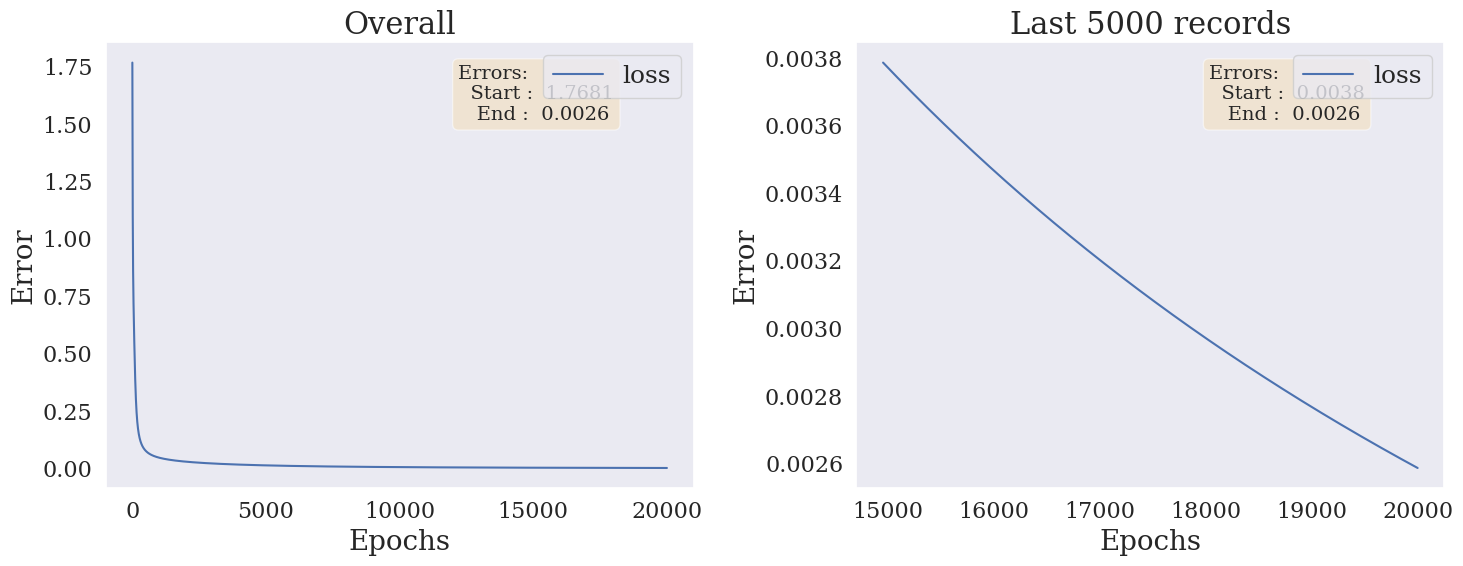

In [31]:
####################################################
loss_df = pd.DataFrame(loss_hist)
#####################################################
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 5000

ax = axes[0]

loss_df.plot(x = 'epoch', y = 'loss', ax = ax)
loss = loss_df['loss'].values

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss[0],loss[-1]) #text to plot
# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();

ax = axes[1]

loss_df[-l_range:].plot(x = 'epoch', y = 'loss', ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss[-l_range],loss[-1]) #text to plot
# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Last {} records'.format(l_range))
ax.grid()
plt.tight_layout()
#####################################################

[[11  0  0]
 [ 0  9  2]
 [ 0  0 10]]


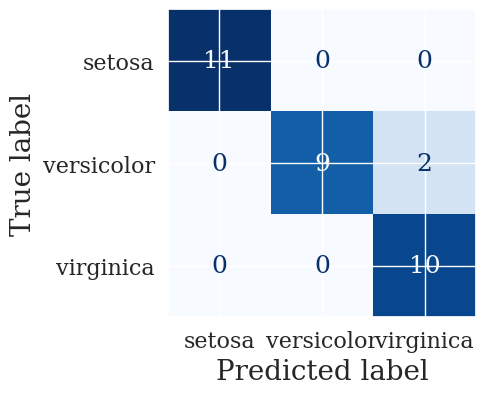

In [30]:
#####################################################
cm  = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['setosa', 'versicolor', 'virginica'])

fig, ax = plt.subplots(figsize = (4,4))

disp.plot(ax = ax, cmap = 'Blues', colorbar=False)

plt.show()